<a href="https://colab.research.google.com/github/AsthmaticDonkey/Thesis/blob/master/MatchImage2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install image-match

     |████████████████████████████████| 20.7MB 1.2MB/s 
     |████████████████████████████████| 61kB 19.4MB/s 
  Created wheel for image-match: filename=image_match-1.1.2-cp36-none-any.whl size=21229 sha256=83959e0fe2804b6263c0a6f2f325a55f447e6f35c2e247938ce6e805eb82ebdd
  Stored in directory: /root/.cache/pip/wheels/31/a7/b6/cfa60a9034872415c1b49505b28f737014d77459ecb9e94e85
  Created wheel for scikit-image: filename=scikit_image-0.12.3-cp36-cp36m-linux_x86_64.whl size=26738611 sha256=b4a1fe05db7cfadf55d021afb73a21fed7d3f961261f4e3ddd44d49d4c928199
  Stored in directory: /root/.cache/pip/wheels/bc/98/ff/364a64db93b1909ecc2d1e75035ec56f27b5f53b4b31527fe1
Successfully built image-match scikit-image
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.15.0
    Uninstalling scikit-image-0.15.0:
      Successfully uninstalled scikit-image-0.15.0


In [0]:
from google.colab import drive
drive.mount('/content/drive')
from fastai import *
from fastai.vision import *
import image_match
from image_match.goldberg import ImageSignature
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from image_match.goldberg import ImageSignature

path = Path('/content/drive/My Drive/ThesisData')

dest = path
dest.mkdir(parents=True, exist_ok=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


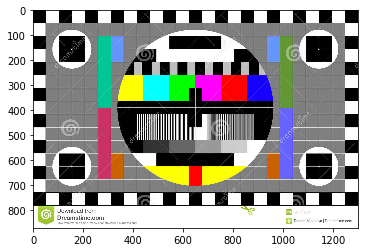

In [0]:
#img=mpimg.imread('/content/drive/My Drive/ThesisData/088.png')
img=mpimg.imread('/content/drive/My Drive/test.jpg')
imgplot = plt.imshow(img)


gis = ImageSignature()
a = gis.generate_signature(img)
directory = '/content/drive/My Drive/ThesisData/'

dimg = []

for filename in sorted(os.listdir(r'/content/drive/My Drive/ThesisData/')):
  if filename.endswith(".jpg") or filename.endswith(".png"):
    img1 = mpimg.imread((directory+filename))
    dimg.append(img1)
        

0
0.6998032564705058
0


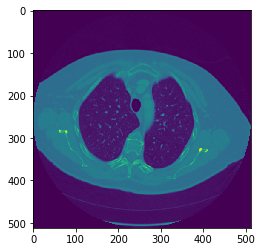

In [0]:
inti = 0
mlist = [] 
direction = 0

for img1 in dimg:
  b = gis.generate_signature(img1)
  mlist.append([gis.normalized_distance(a, b),inti,direction])
  if(gis.normalized_distance(a, b) == 0):
    print('found')
  inti = inti+1

tformIm = []
tformArr = []

length1 = len(dimg)
length2 = len(dimg[0])

for inti1 in range(0,length1):
  for inti2 in range(0,length2):
    tformIm.append(dimg[inti1][inti2])
  tformArr.append(tformIm)
  tformIm = []

inti = 0
direction = 1
for img2 in tformArr:
  b = gis.generate_signature(img1)
  mlist.append([gis.normalized_distance(a, b),inti,direction])
  if(gis.normalized_distance(a, b) == 0):
    print('found')
  inti = inti+1


numMatch = 100
ind = 1
direc = 5

for i in mlist:
  if(i[0] < numMatch):
    numMatch = i[0]
    ind = i[1]
    direc = i[2]
    
      
print(ind)
print(numMatch)
if(numMatch>0.5):
  direc = 5;
print(direc)



if(direc == 0):
  imgplot = plt.imshow(dimg[ind])
elif(direc == 1):
  imgplot = plt.imshow([ind])
elif(direc == 5):
  print("No Match Found")

In [0]:
classes = ['Longitudinal Section','Cross-Section']
path = Path('/content/drive/My Drive/ThesisData/ML')

folder = 'LongitudinalSection'
file = 'urls_LS.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'Cross-Section'
file = 'urls_CS.csv'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'LongitudinalSection'
file = 'urls_LS.csv'
dest = path/folder
download_images(dest/file, dest, max_pics=300)

folder = 'Cross-Section'
file = 'urls_CS.csv'
dest = path/folder
download_images(dest/file, dest, max_pics=300)


In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:259: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access these elements in self.train_ds: 182,209,108
  warn(warn_msg)


In [0]:
data.classes

['Cross-Section', 'LongitudinalSection']

In [0]:
data.show_batch(rows=3, figsize=(7,8))

OSError: ignored